In [1]:
import pickle
import glob, os
dataset_id = "ID41"

data_dir="/workdir/jupyter/Cosy2021_tot_data_taking_data"
data_file_list = []
for file in glob.glob("{:s}/*{:s}*".format(data_dir,dataset_id)):
# archive(label="ID_{:s}_tot_data_cosy2021_lena_newMBOs".format(dataset_id))
    data_file_list += [file ]

#list_file ="/workdir/jupyter/Cosy2021_tot_data_taking_data/datasetID_11_gainscan_spikerejVer5_highbeamintensity_list.pickle"
#list_file ="ID10_gainscan_spikerejVer5_NoBeamNoise_HV1750V_ptime_10_thr_5_gain_4_boardsON_0_sr_0"
# if ".pickle" in list_file:
#     with open (list_file,'rb') as fp:
#      data_file_list = pickle.load(fp) 
print(data_file_list)


['/workdir/jupyter/Cosy2021_tot_data_taking_data/ID41_final_highstat_settingA_HV1750V_ptime_15_thr_10_gain_4_boardsON_0_sr_0_srTDC_0.root']


Welcome to JupyROOT 6.14/04
data file   , tot_mostprob signalcounts noisecounts sn_ratio significance
/workdir/jupyter/Cosy2021_tot_data_taking_data/ID41_final_highstat_settingA_HV1750V_ptime_15_thr_10_gain_4_boardsON_0_sr_0_srTDC_0.root
Cosy2021_tot_data_taking_data/ID41_final_highstat_settingA_HV1750V_ptime_15_thr_10_gain_4_boardsON_0_sr_0_srTDC_0. |  16.5 |  20071.0 |  42691.0 |  0.47 |  80.12


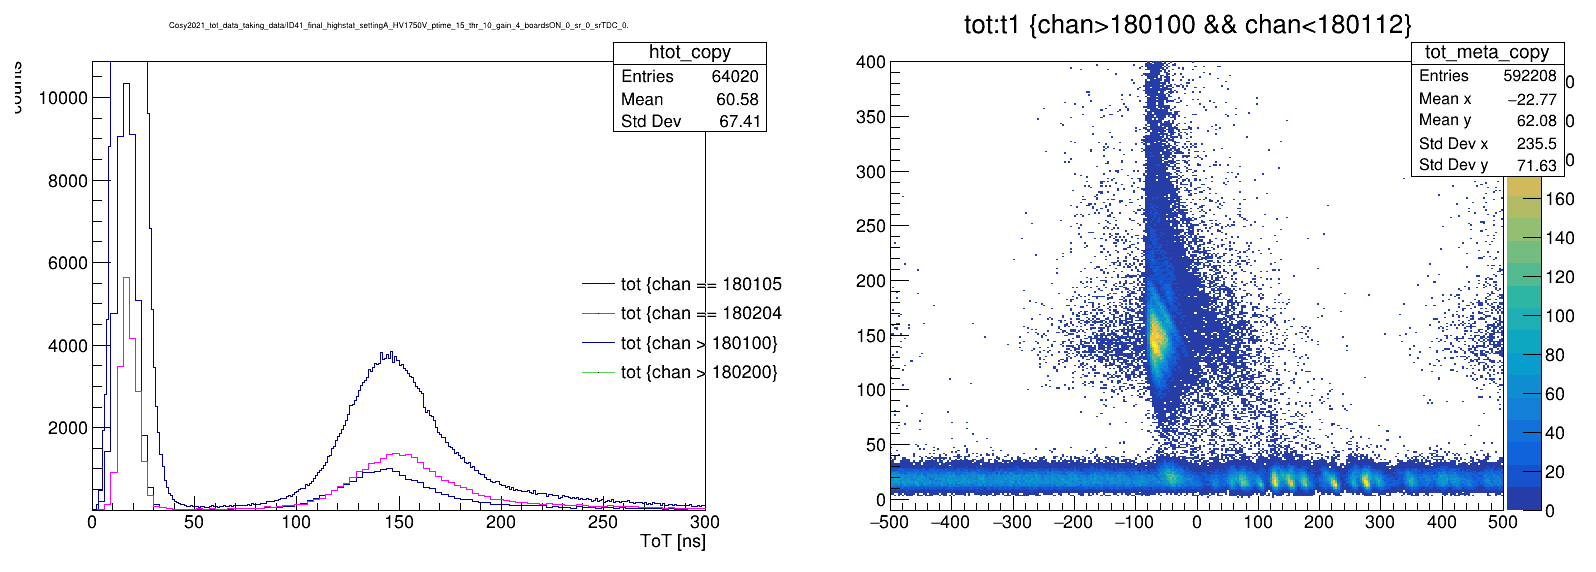

In [2]:

##################################################
##               slurp root file                ##
##################################################
 
#with open ('/workdir/jupyter/tot_data_taking_data/HV1600V_ptime_15_threshold_50_gain_4_boardsON_23.rootlist.pickle', 'rb') as fp:
import ROOT
import numpy as np

#f = ROOT.TFile("/workdir/tree_out.root".format(data_dir))
#tree = f.Get("TDC_1503")
#print("data entries TDC_1503: " + str(tree.GetEntries()))
i = -1
clist = [None]*100
print("data file   ,", "tot_mostprob", "signalcounts", "noisecounts", "sn_ratio", "significance")
    
for data_file in data_file_list:
    i += 1
    print(data_file)
    f = ROOT.TFile("{:s}".format(data_file))
    #f = ROOT.TFile("{:s}".format("/workdir/tree_out.root"))    
    tree = f.Get("joint_tree")
    #tree = f.Get("TDC_1800")
    #print("data entries: " + str(tree.GetEntries()))
    ## plot data:
    clist[i] = ROOT.TCanvas("myCanvasName"+str(i),str(data_file),1600,600)
    clist[i].Divide(2,1)
    clist[i].cd(1)    
    #tree.Draw("tot>>htot(300,0,300)","chan > 150300 && chan < 150316")
    #tree.Draw("tot>>htot2(300,0,300)","chan > 035300 && chan < 035316","same")   
    tree.Draw("tot>>htot3(300,0,300)","chan > 180100") 
    tree.Draw("tot>>htot4(300,0,300)","chan > 180200") 
    #tree = f.Get("TDC_1503")
    #tree.Draw("tot>>htot2(300,0,1000)","chan > 00") 
    #tree.Draw("tot>>htot3(100,0,600)","chan > 180000 && chan < 180099")  
    #tree.Draw("tot>>htot2(100,0,600)","chan > 180100 && chan < 180199") 
    #tree.Draw("tot>>htot3(100,0,600)","chan > 180200 && chan < 180299") 
    #tree.Draw("tot>>htot2(100,0,600)","chan > 180300 && chan < 180399")  
    #tree.Draw("tot>>htot3(100,0,600)","chan > 0") 
    #tree.Draw("tot>>htot4(100,0,600)","chan > 150300 && chan < 150399")    
    tree.Draw("tot>>htot(100,0,300)","chan == 180105") 
    tree.Draw("tot>>htot2(100,0,300)","chan == 180204")
   # clist[i].Draw()
    htot = f.Get("htot")
    htot2 = f.Get("htot2")
    htot3 = f.Get("htot3")
    htot4 = f.Get("htot4")    
    
    htot.GetXaxis().SetTitle("ToT [ns]")
    htot.GetYaxis().SetTitle("counts")
    leg = ROOT.TLegend(.73,.32,.97,.53)
    leg.SetBorderSize(0)
    leg.SetFillColor(0)
    leg.SetFillStyle(0)
    leg.SetTextFont(42)
    leg.SetTextSize(0.035)
    leg.AddEntry(htot,htot.GetTitle());
    leg.AddEntry(htot2,htot2.GetTitle());
    leg.AddEntry(htot3,htot3.GetTitle());
    leg.AddEntry(htot4,htot4.GetTitle());     
    
    htot.SetTitle(data_file.strip("workdir/jupyter/tot_data_taking_data"))
    htot2.SetLineColor(6)
    htot.SetMinimum(0.1)
    htot.DrawCopy("")
    htot2.DrawCopy("same")
#     htot3.SetLineColor(7)
    htot3.DrawCopy("same")
    htot4.SetLineColor(8)
#     htot4.DrawCopy("same")
   
    leg.Draw();
    clist[i].SetLogy()
    clist[i].Draw()
    clist[i].cd(2)      
    tdc=1801
    disp_channels = 12
    tree.Draw("tot:t1>>tot_meta(300,-500,500,300,-10,400)","chan>{:d} && chan<{:d}".format(tdc*100,tdc*100+disp_channels),"colz")
    potato = f.Get("tot_meta")
    potato.DrawCopy("colz")
    clist[i].Draw()
    
    
    tot_mostprob = htot.GetXaxis().GetBinCenter(htot.GetMaximumBin())
    
    signalcounts  = htot.Integral(htot.FindBin(50),htot.GetNbinsX())
    noisecounts   = htot.Integral(1,htot.FindBin(50))
    if noisecounts == 0:
        sn_ratio = -1
        significance = -1
    else:
        sn_ratio = signalcounts/noisecounts
        significance = signalcounts/np.sqrt(signalcounts+noisecounts)
    print(  htot.GetTitle() , "| ",  tot_mostprob,"| ", signalcounts,"| ", noisecounts,"| ", "{:.2f}".format(sn_ratio),"| ", "{:.2f}".format(significance))
    


In [3]:
tot_mostprob = htot.GetXaxis().GetBinCenter(htot.GetMaximumBin())
    
signalcounts  = htot3.Integral(htot3.FindBin(40),htot3.GetNbinsX())
noisecounts   = htot3.Integral(1,htot3.FindBin(40))
print(signalcounts)
signalcounts2  = htot2.Integral(htot2.FindBin(40),htot2.GetNbinsX())
noisecounts2   = htot2.Integral(1,htot2.FindBin(40))
print(signalcounts,signalcounts2)
print(signalcounts/signalcounts2)
print(noisecounts/noisecounts2)
if noisecounts == 0:
    sn_ratio = -1
    significance = -1
else:
    sn_ratio = signalcounts/noisecounts
    significance = signalcounts/np.sqrt(signalcounts+noisecounts)
print(  htot.GetTitle() , "| ",  tot_mostprob,"| ", signalcounts,"| ", noisecounts,"| ", "{:.2f}".format(sn_ratio),"| ", "{:.2f}".format(significance))


237201.0
237201.0 29213.0
8.119706979769282
36.87563291139241
Cosy2021_tot_data_taking_data/ID41_final_highstat_settingA_HV1750V_ptime_15_thr_10_gain_4_boardsON_0_sr_0_srTDC_0. |  16.5 |  237201.0 |  699162.0 |  0.34 |  245.13


In [4]:

c = ROOT.TCanvas("correl","correlations",640,480)


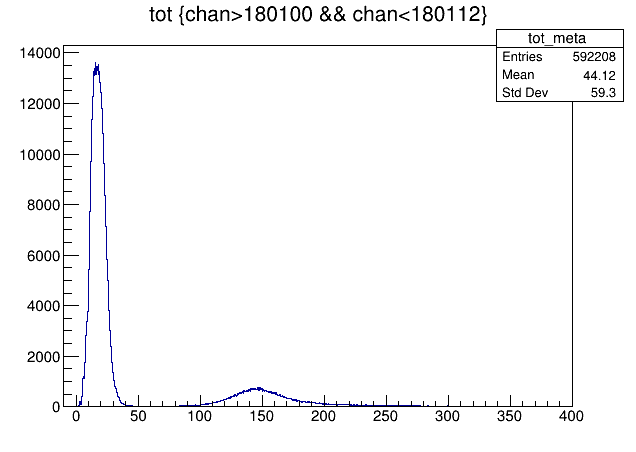

In [5]:
tdc=1801
disp_channels = 12
tree.Draw("tot>>tot_meta(1000,-10,400)","chan>{:d} && chan<{:d}".format(tdc*100,tdc*100+disp_channels))
c.Draw()

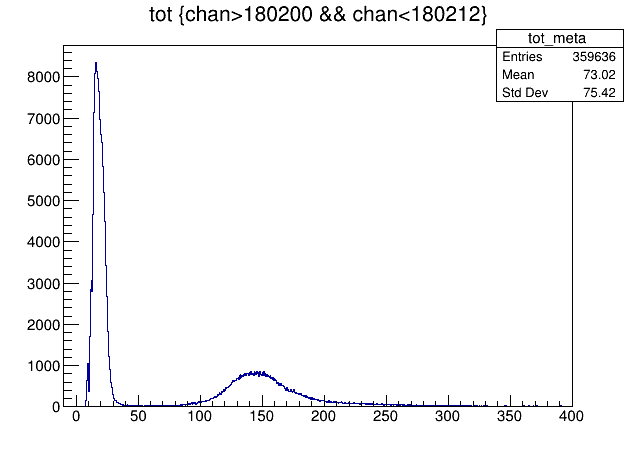

In [6]:
tdc=1802
disp_channels = 12
tree.Draw("tot>>tot_meta(1000,-10,400)","chan>{:d} && chan<{:d}".format(tdc*100,tdc*100+disp_channels))
c.Draw()

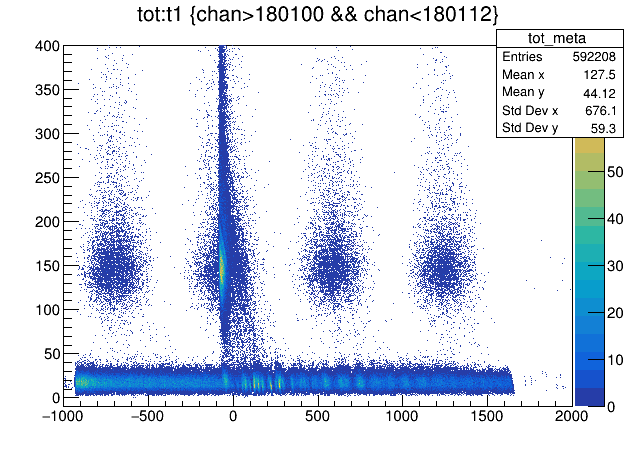

In [7]:
tdc=1801
disp_channels = 12
tree.Draw("tot:t1>>tot_meta(1000,-1000,2000,1000,-10,400)","chan>{:d} && chan<{:d}".format(tdc*100,tdc*100+disp_channels),"colz")
c.Draw()

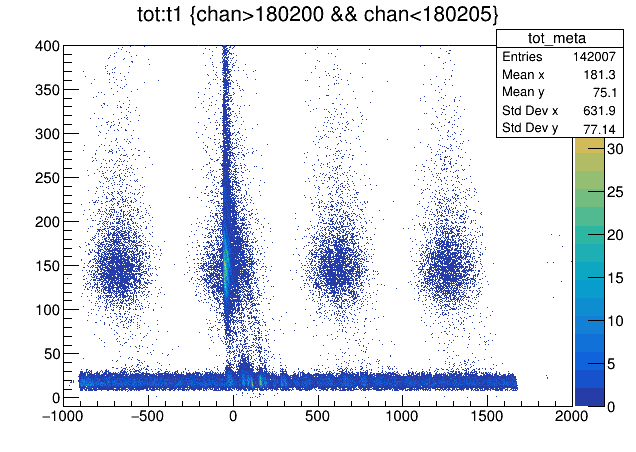

In [8]:
tdc=1802
disp_channels = 5
tree.Draw("tot:t1>>tot_meta(1000,-1000,2000,1000,-10,400)","chan>{:d} && chan<{:d}".format(tdc*100,tdc*100+disp_channels),"colz")
c.Draw()

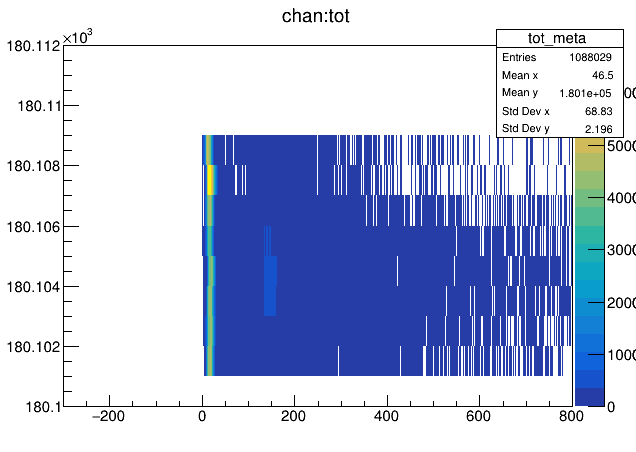

In [9]:

tdc=1801
disp_channels = 12
#tree.Draw("chan:t1","","lego2")
tree.Draw("chan:tot>>tot_meta(1000,-300,800,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()

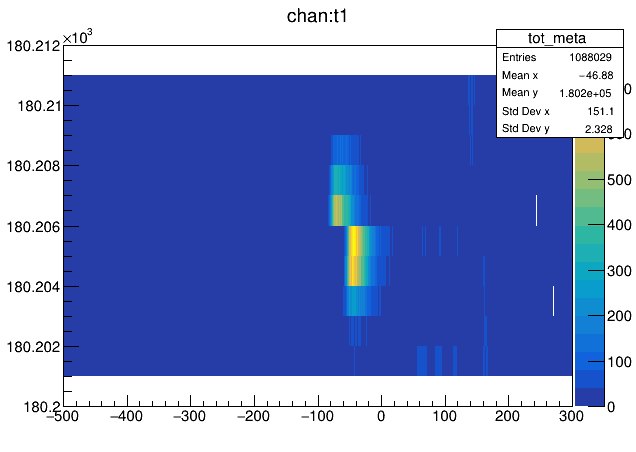

In [10]:
##################################################
##             overview TDC 0x0351              ##
##################################################
c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)

tdc=1802
disp_channels = 12
#tree.Draw("chan:t1","","lego2")
tree.Draw("chan:t1>>tot_meta(1000,-500,300,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()

In [11]:
#archive(label="ID_{:s}_tot_data_cosy2021_lena_newMBOs".format(dataset_id))

#### 